# Laboratorio 1

- Jaime Andres Torres Bermejo - 202014866
- Elkin Rafael Cuello - 202215037

## Problema 1: 

Un Scrum Master necesita asignar un conjunto de tareas a un equipo de desarrollo (pod) basado en la prioridad de las tareas y los puntos de historia asociados. El equipo consiste en 4 desarolladores, y la duración del sprint suele ser de 2 semanas. Por regla general cada desarollador no debe tener mas de 24 puntos de historia asociados a ellos mismos. Con base a esta información realiza un modelo de optimización que tome las tareas que se pueden realizar en este sprint teniendo en cuenta que queremos maximizar la cantidad de tareas realizadas con la mayor prioridad.

Para efectos de este problema, debemos

 -	Definir las tareas disponibles y sus puntos de historia.
 -	Definir la prioridad de cada tarea.
 -	Implementar un modelo de programación lineal para resolver el problema.
 -	Maximizar la suma de las prioridades de las tareas completadas sin exceder la restricción de los puntos de historia.

Las tareas son:

|     # Tarea    |     Puntos de historia    |     Prioridad     |
|----------------|---------------------------|-------------------|
|     1          |     5                     |     Maxima        |
|     2          |     3                     |     Media alta    |
|     3          |     13                    |     Alta          |
|     4          |     1                     |     Media baja    |
|     5          |     21                    |     Minima        |
|     6          |     2                     |     Media         |
|     7          |     2                     |     Alta          |
|     8          |     5                     |     Media         |
|     9          |     8                     |     baja          |
|     10         |     13                    |     Maxima        |
|     12         |     21                    |     alta          |

## Paso 1: Determinación de las restricciones

Dado este sistema, vamos a asumir que podemos tomar los valores numéricos pensados en este 

$$

Desarrolladores = 4\\

puntos\_ equipo \leq 24 \cdot Desarrolladores


$$

Este problema es muy parecido al problema de la mochila (knapsack problem) al hacerse de forma tradicional, sin embargo, el uso de modelado hace que sea mucho mas intuitivamente, la funcion objetivo se va a ver de la siguiente forma:

$$ F_o = max(\sum_{i = 0}^{n} x_i \cdot p_i ; i \in \mathbb{Z})\\
    F_o \leq puntos\_ equipo
$$

Se van a asignar los siguientes valores numéricos a las prioridades

In [12]:
## Solución propuesta por Elkin.

from __future__ import division
from pyomo.environ import *

from pyomo.opt import SolverFactory

Model = ConcreteModel(name='lab1_p1')

# Data de entrada
numTareas=11
num_desarrolladores = 4

p=RangeSet(1, 11)

prioridad={1:7, 2:5, 3:6, 4:3, 5:1, 6:4, 7:6, 8:4, 9:2, 10:7, 11:6}
p_historia={1:5, 2:3, 3:13, 4:1, 5:21, 6:2, 7:2, 8:5, 9:8, 10:13, 11:21}

# Variable de decisión                          
Model.x = Var(p, domain=Binary)

# Función objetivo
Model.obj = Objective(expr = sum(Model.x[i]*prioridad[i] for i in p), sense=maximize)

# Restricciones
Model.res1 = Constraint(expr = sum(Model.x[i]*p_historia[i] for i in p) <= 24*num_desarrolladores)

# Especificación del solver
SolverFactory('glpk').solve(Model)

Model.display()

Model lab1_p1

  Variables:
    x : Size=11, Index=[1:11]
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   1.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary
          6 :     0 :   1.0 :     1 : False : False : Binary
          7 :     0 :   1.0 :     1 : False : False : Binary
          8 :     0 :   1.0 :     1 : False : False : Binary
          9 :     0 :   1.0 :     1 : False : False : Binary
         10 :     0 :   1.0 :     1 : False : False : Binary
         11 :     0 :   1.0 :     1 : False : False : Binary

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :  51.0

  Constraints:
    res1 : Size=1
        Key  : Lower : Body : Upper
        None :  None : 

## Problema 2: Asignación de Trabajos a Trabajadores

### Descripción

En este problema, los estudiantes abordarán un problema básico de optimización combinatoria a través de la asignación de tareas a trabajadores. Un gerente necesita asignar trabajos a un conjunto de trabajadores, cada uno con un tiempo disponible. Cada trabajo tiene una ganancia asociada y un tiempo de realización. El objetivo es asignar los trabajos de manera que se maximice la ganancia total sin exceder el tiempo disponible para cada trabajador

### Instrucciones:

-	Define los trabajadores disponibles y su tiempo de trabajo.
-	Define los trabajos y su ganancia.
-	Implementa un modelo de programación entera para resolver el problema.
-	Maximiza la ganancia total sin exceder el tiempo de trabajo disponible para cada trabajador.


### Datos del Problema

Los trabajadores son:

|     # Trabajador    |     Horas    |
|---------------------|--------------|
|     1               |     8        |
|     2               |     10       |
|     3               |     6        |

Y los trabajos son:

|     # Trabajo    |     Ganancia (USD)    |     Tiempo (Horas)    |
|------------------|-----------------------|-----------------------|
|     1            |     50                |     4                 |
|     2            |     60                |     5                 |
|     3            |     40                |     3                 |
|     4            |     70                |     6                 |
|     5            |     30                |     2                 |

In [13]:
# -*- coding: utf-8 -*-
#Solucion por Elkin

from __future__ import division
from pyomo.environ import *

from pyomo.opt import SolverFactory

Model = ConcreteModel(name='lab1_p2')

# -----------------------------------------------

trabajadores = [1,2,3]
trabajos = [1,2,3,4,5]

tiempo_trabajadores = {1:8, 2:10, 3:6}
tiempo_trabajos = {1:4, 2:5, 3:3, 4:6, 5:2}
ganancia_trabajos = {1:50, 2:60, 3:40, 4:70, 5:30}


# Variable de decision
Model.x = Var(trabajadores, trabajos, domain=Binary) # Trabajadores

# Funcion objetivo:
Model.obj = Objective(expr = sum(ganancia_trabajos[j] * Model.x[i,j] for i in trabajadores for j in trabajos), sense=maximize)


# Restriccion de tiempo de los trabajadores
def restriccion_tiempo(model, i):
    return sum(tiempo_trabajos[j] * Model.x[i,j] for j in trabajos) <= tiempo_trabajadores[i]
        
Model.restr_tiempo = Constraint(trabajadores, rule = restriccion_tiempo)


# Restriccion de asignacion (cada trabajo se puede asignar una vez)
def restriccion_asignacion(model, j):
    return sum(model.x[i, j] for i in trabajadores) <= 1
Model.restriccion_asignacion = Constraint(trabajos, rule=restriccion_asignacion)


# Especificación del solver
SolverFactory('glpk').solve(Model)

Model.display()

Model lab1_p2

  Variables:
    x : Size=15, Index={1, 2, 3}*{1, 2, 3, 4, 5}
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :     0 :   1.0 :     1 : False : False : Binary
        (1, 2) :     0 :   0.0 :     1 : False : False : Binary
        (1, 3) :     0 :   0.0 :     1 : False : False : Binary
        (1, 4) :     0 :   0.0 :     1 : False : False : Binary
        (1, 5) :     0 :   1.0 :     1 : False : False : Binary
        (2, 1) :     0 :   0.0 :     1 : False : False : Binary
        (2, 2) :     0 :   1.0 :     1 : False : False : Binary
        (2, 3) :     0 :   1.0 :     1 : False : False : Binary
        (2, 4) :     0 :   0.0 :     1 : False : False : Binary
        (2, 5) :     0 :   0.0 :     1 : False : False : Binary
        (3, 1) :     0 :   0.0 :     1 : False : False : Binary
        (3, 2) :     0 :   0.0 :     1 : False : False : Binary
        (3, 3) :     0 :   0.0 :     1 : False : False : Binary
        (3, 4) :     0 :   

## Problema 3: Misión Humanitaria a Zambia

Zambia enfrenta una crisis humanitaria debido a desastres naturales, y es urgente transportar recursos esenciales a las áreas afectadas. SenecaLibre ha sido seleccionada para coordinar esta misión y debe utilizar su flota de aviones para transportar suministros críticos. Los recursos incluyen alimentos, medicinas, equipos médicos, agua potable y mantas, cada uno con su propio nivel de prioridad, peso y volumen. Cada avión tiene una capacidad máxima en términos de carga y espacio, y existen ciertas restricciones logísticas que deben respetarse.

### Datos del Problema:

| Recursos          | Valor | Peso (TON) | Volumen (m^3) |
|-------------------|-------|------------|---------------|
| Alimentos Básicos | 50    | 15         | 8             |
| Medicinas         | 100   | 5          | 2             |
| Equipos Médicos   | 120   | 20         | 10            |
| Agua Potable      | 60    | 18         | 12            |
| Mantas            | 40    | 10         | 6             |


| Avion   | Capacidad (TON) | Capacidad volumetrica (m^3) |
|---------|-----------------|-----------------------------|
| Avión 1 | 30              | 25                          |
| Avión 2 | 40              | 30                          |
| Avión 3 | 50              | 35                          |

### Restricciones de Almacenamiento de Recursos:

| Seguridad de Medicamentos                        | No se puede transportar a las Medicinas en el Avión 1 por la falta de condiciones para mantener la temperatura controlada, crucial para la efectividad de los medicamentos.                   |
|--------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Compatibilidad de Equipos Médicos y Agua Potable | Los Equipos Médicos y el Agua Potable no pueden ser transportados en el mismo avión debido al riesgo de contaminación cruzada. El derrame de agua podría dañar los equipos médicos delicados. |

### Casos para analizar:

- ¿Que impacto tiene las restricciones de almacenamiento de recursos?
- ¿Que pasa si no tengo en cuenta la restricción volumetrica?


In [14]:
# Zambia enfrenta una crisis humanitaria debido a desastres naturales, y es urgente transportar recursos esenciales a las áreas afectadas. SenecaLibre ha sido seleccionada para coordinar esta misión y debe utilizar su flota de aviones para transportar suministros críticos. Los recursos incluyen alimentos, medicinas, equipos médicos, agua potable y mantas, cada uno con su propio nivel de prioridad, peso y volumen. Cada avión tiene una capacidad máxima en términos de carga y espacio, y existen ciertas restricciones logísticas que deben respetarse.
# Datos del Problema:
# Recursos	Valor	Peso (TON)	Volumen (m^3)
# Alimentos Básicos	50	15	8
# Medicinas	100	5	2
# Equipos Médicos	120	20	10
# Agua Potable	60	18	12
# Mantas	40	10	6

# Avion	Capacidad (TON)	Capacidad volumetrica (m^3)
# Avión 1	30	25
# Avión 2	40	30
# Avión 3	50	35
# Restricciones de Almacenamiento de Recursos:
# Seguridad de Medicamentos	No se puede transportar a las Medicinas en el Avión 1 por la falta de condiciones para mantener la temperatura controlada, crucial para la efectividad de los medicamentos.
# Compatibilidad de Equipos Médicos y Agua Potable	Los Equipos Médicos y el Agua Potable no pueden ser transportados en el mismo avión debido al riesgo de contaminación cruzada. El derrame de agua podría dañar los equipos médicos delicados.

#Solucion por Elkin


from __future__ import division
from pyomo.environ import *

from pyomo.opt import SolverFactory

Model = ConcreteModel(name='lab1_p3')

# -----------------------------------------------

recursos = ['Alimentos', 'Medicinas', 'Equipos', 'Agua', 'Mantas']
aviones = ['Avion1', 'Avion2', 'Avion3']

valor = {'Alimentos':50, 'Medicinas':100, 'Equipos':120, 'Agua':60, 'Mantas':40}
peso = {'Alimentos':15, 'Medicinas':5, 'Equipos':20, 'Agua':18, 'Mantas':10}
volumen = {'Alimentos':8, 'Medicinas':2, 'Equipos':10, 'Agua':12, 'Mantas':6}

capacidad_peso = {'Avion1':30, 'Avion2':40, 'Avion3':50}
capacidad_volumen = {'Avion1':25, 'Avion2':30, 'Avion3':35}

# Variable de decision
Model.x = Var(recursos, aviones, domain=Binary) # Recursos

# Funcion objetivo:
Model.obj = Objective(expr = sum(valor[i] * Model.x[i,j] for i in recursos for j in aviones), sense=maximize)


# Restriccion de peso de los aviones
def restriccion_peso(model, j):
    return sum(peso[i] * Model.x[i,j] for i in recursos) <= capacidad_peso[j]

Model.restr_peso = Constraint(aviones, rule = restriccion_peso)


# Restriccion de volumen de los aviones
def restriccion_volumen(model, j):
    return sum(volumen[i] * Model.x[i,j] for i in recursos) <= capacidad_volumen[j]

Model.restr_volumen = Constraint(aviones, rule = restriccion_volumen)


# Restricciones de almacenamiento de recursos
def restriccion_almacenamiento(model):
    return Model.x['Medicinas','Avion1'] == 0
Model.restr_almacenamiento = Constraint(rule=restriccion_almacenamiento)

def restriccion_almacenamiento2(model):
    return Model.x['Equipos','Avion2'] + Model.x['Agua','Avion2'] <= 1
Model.restr_almacenamiento2 = Constraint(rule=restriccion_almacenamiento2)


# Especificación del solver
SolverFactory('glpk').solve(Model)

Model.display()

Model lab1_p3

  Variables:
    x : Size=15, Index={Alimentos, Medicinas, Equipos, Agua, Mantas}*{Avion1, Avion2, Avion3}
        Key                     : Lower : Value : Upper : Fixed : Stale : Domain
             ('Agua', 'Avion1') :     0 :   0.0 :     1 : False : False : Binary
             ('Agua', 'Avion2') :     0 :   0.0 :     1 : False : False : Binary
             ('Agua', 'Avion3') :     0 :   0.0 :     1 : False : False : Binary
        ('Alimentos', 'Avion1') :     0 :   0.0 :     1 : False : False : Binary
        ('Alimentos', 'Avion2') :     0 :   1.0 :     1 : False : False : Binary
        ('Alimentos', 'Avion3') :     0 :   1.0 :     1 : False : False : Binary
          ('Equipos', 'Avion1') :     0 :   1.0 :     1 : False : False : Binary
          ('Equipos', 'Avion2') :     0 :   1.0 :     1 : False : False : Binary
          ('Equipos', 'Avion3') :     0 :   1.0 :     1 : False : False : Binary
           ('Mantas', 'Avion1') :     0 :   1.0 :     1 : False : Fa

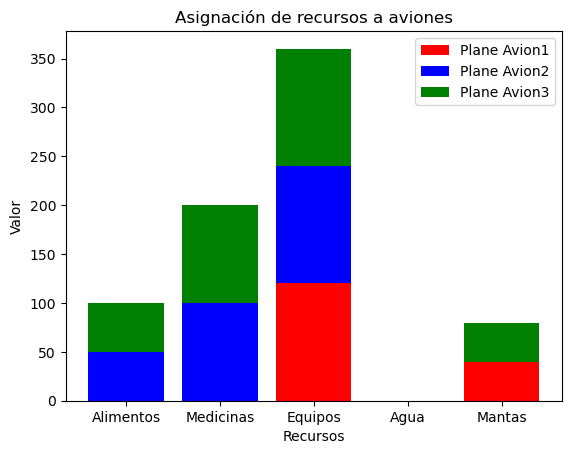

In [15]:
from matplotlib import pyplot as plt

# Data for plotting
resources = recursos# Resource names
P = aviones
values = [valor[r] for r in resources]  # Value of each resource

# Selection status for each plane
selected = [[Model.x[r,p]() for r in resources] for p in P]

# Creating a stacked bar chart
colors = ['red', 'blue', 'green']  # Different colors for each plane

# Plot the resource allocation
for i, p in enumerate(P):
    plt.bar(resources, [v * sel for v, sel in zip(values, selected[i])], color=colors[i], label=f'Plane {p}', bottom=[sum(selected[k][r] * values[r] for k in range(i)) for r in range(len(resources))])

plt.xlabel("Recursos")
plt.ylabel("Valor")
plt.title("Asignación de recursos a aviones")

# Adding labels
plt.xticks(range(len(resources)), resources)
plt.legend()

plt.show()

## Caso Hipotetico 1:  ¿Que impacto tiene las restricciones de almacenamiento de recursos?

Estas restricciones impiden que se elijan ciertas configuraciones dentro del modelo. Los especificos de estas restricciones estan en el enunciado como tal. Fueron implementados en orden y se definen en las siguientes lineas:

```python
# Restricciones de almacenamiento de recursos
def restriccion_almacenamiento(model):
    return Model.x['Medicinas','Avion1'] == 0
Model.restr_almacenamiento = Constraint(rule=restriccion_almacenamiento)

def restriccion_almacenamiento2(model):
    return Model.x['Equipos','Avion2'] + Model.x['Agua','Avion2'] <= 1
Model.restr_almacenamiento2 = Constraint(rule=restriccion_almacenamiento2)

```

Al eliminar estas restricciones, la respuesta del modelo, manteniendo el resto del código intacto, es la siguiente:

In [16]:
 from __future__ import division
from pyomo.environ import *

from pyomo.opt import SolverFactory

Model = ConcreteModel(name='lab1_p3')

# -----------------------------------------------

recursos = ['Alimentos', 'Medicinas', 'Equipos', 'Agua', 'Mantas']
aviones = ['Avion1', 'Avion2', 'Avion3']

valor = {'Alimentos':50, 'Medicinas':100, 'Equipos':120, 'Agua':60, 'Mantas':40}
peso = {'Alimentos':15, 'Medicinas':5, 'Equipos':20, 'Agua':18, 'Mantas':10}
volumen = {'Alimentos':8, 'Medicinas':2, 'Equipos':10, 'Agua':12, 'Mantas':6}

capacidad_peso = {'Avion1':30, 'Avion2':40, 'Avion3':50}
capacidad_volumen = {'Avion1':25, 'Avion2':30, 'Avion3':35}

# Variable de decision
Model.x = Var(recursos, aviones, domain=Binary) # Recursos

# Funcion objetivo:
Model.obj = Objective(expr = sum(valor[i] * Model.x[i,j] for i in recursos for j in aviones), sense=maximize)


# Restriccion de peso de los aviones
def restriccion_peso(model, j):
    return sum(peso[i] * Model.x[i,j] for i in recursos) <= capacidad_peso[j]

Model.restr_peso = Constraint(aviones, rule = restriccion_peso)


# Restriccion de volumen de los aviones
def restriccion_volumen(model, j):
    return sum(volumen[i] * Model.x[i,j] for i in recursos) <= capacidad_volumen[j]

Model.restr_volumen = Constraint(aviones, rule = restriccion_volumen)

#se eliminan las restricciones del modelo.

# Especificación del solver
SolverFactory('glpk').solve(Model)

Model.display()

Model lab1_p3

  Variables:
    x : Size=15, Index={Alimentos, Medicinas, Equipos, Agua, Mantas}*{Avion1, Avion2, Avion3}
        Key                     : Lower : Value : Upper : Fixed : Stale : Domain
             ('Agua', 'Avion1') :     0 :   0.0 :     1 : False : False : Binary
             ('Agua', 'Avion2') :     0 :   0.0 :     1 : False : False : Binary
             ('Agua', 'Avion3') :     0 :   0.0 :     1 : False : False : Binary
        ('Alimentos', 'Avion1') :     0 :   0.0 :     1 : False : False : Binary
        ('Alimentos', 'Avion2') :     0 :   1.0 :     1 : False : False : Binary
        ('Alimentos', 'Avion3') :     0 :   1.0 :     1 : False : False : Binary
          ('Equipos', 'Avion1') :     0 :   1.0 :     1 : False : False : Binary
          ('Equipos', 'Avion2') :     0 :   1.0 :     1 : False : False : Binary
          ('Equipos', 'Avion3') :     0 :   1.0 :     1 : False : False : Binary
           ('Mantas', 'Avion1') :     0 :   0.0 :     1 : False : Fa

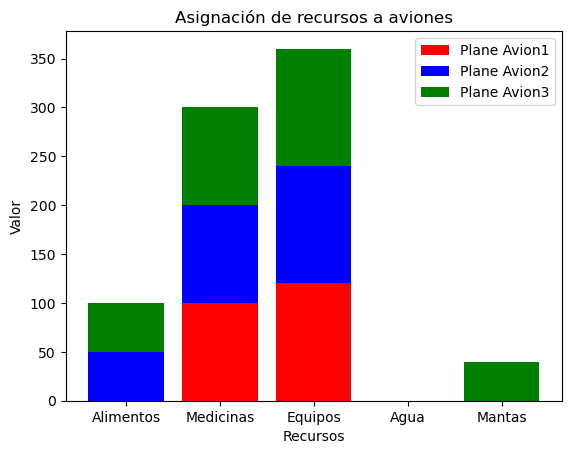

In [17]:
from matplotlib import pyplot as plt

# Data for plotting
resources = recursos# Resource names
P = aviones
values = [valor[r] for r in resources]  # Value of each resource

# Selection status for each plane
selected = [[Model.x[r,p]() for r in resources] for p in P]

# Creating a stacked bar chart
colors = ['red', 'blue', 'green']  # Different colors for each plane

# Plot the resource allocation
for i, p in enumerate(P):
    plt.bar(resources, [v * sel for v, sel in zip(values, selected[i])], color=colors[i], label=f'Plane {p}', bottom=[sum(selected[k][r] * values[r] for k in range(i)) for r in range(len(resources))])

plt.xlabel("Recursos")
plt.ylabel("Valor")
plt.title("Asignación de recursos a aviones")

# Adding labels
plt.xticks(range(len(resources)), resources)
plt.legend()

plt.show()

## Caso Hipotetico 2:  - ¿Que pasa si no tengo en cuenta la restricción volumetrica?

Basicamente, esto va a hacer que solo se tenga en cuenta el peso de un objeto a la hora de evaluar el modelo. Esto hace mas laxa la regulación del modelo y afecta el resultado final.
Dentro de la solución acá propuesta, esta restricción se encuentra en las siguientes lineas:

```python

# Restriccion de volumen de los aviones
def restriccion_volumen(model, j):
    return sum(volumen[i] * Model.x[i,j] for i in recursos) <= capacidad_volumen[j]

Model.restr_volumen = Constraint(aviones, rule = restriccion_volumen)

```

Al eliminar estas restriccion, la respuesta del modelo, manteniendo el resto del código intacto, es la siguiente:

In [18]:
import matplotlib as mpl
from __future__ import division
from pyomo.environ import *

from pyomo.opt import SolverFactory

Model = ConcreteModel(name='lab1_p3')

# -----------------------------------------------

recursos = ['Alimentos', 'Medicinas', 'Equipos', 'Agua', 'Mantas']
aviones = ['Avion1', 'Avion2', 'Avion3']

valor = {'Alimentos':50, 'Medicinas':100, 'Equipos':120, 'Agua':60, 'Mantas':40}
peso = {'Alimentos':15, 'Medicinas':5, 'Equipos':20, 'Agua':18, 'Mantas':10}
volumen = {'Alimentos':8, 'Medicinas':2, 'Equipos':10, 'Agua':12, 'Mantas':6}

capacidad_peso = {'Avion1':30, 'Avion2':40, 'Avion3':50}
capacidad_volumen = {'Avion1':25, 'Avion2':30, 'Avion3':35}

# Variable de decision
Model.x = Var(recursos, aviones, domain=Binary) # Recursos

# Funcion objetivo:
Model.obj = Objective(expr = sum(valor[i] * Model.x[i,j] for i in recursos for j in aviones), sense=maximize)


# Restriccion de peso de los aviones
def restriccion_peso(model, j):
    return sum(peso[i] * Model.x[i,j] for i in recursos) <= capacidad_peso[j]

Model.restr_peso = Constraint(aviones, rule = restriccion_peso)


#Se elimina la restricción de volumen.

# Restricciones de almacenamiento de recursos
def restriccion_almacenamiento(model):
    return Model.x['Medicinas','Avion1'] == 0
Model.restr_almacenamiento = Constraint(rule=restriccion_almacenamiento)

def restriccion_almacenamiento2(model):
    return Model.x['Equipos','Avion2'] + Model.x['Agua','Avion2'] <= 1
Model.restr_almacenamiento2 = Constraint(rule=restriccion_almacenamiento2)


# Especificación del solver
SolverFactory('glpk').solve(Model)

Model.display()

Model lab1_p3

  Variables:
    x : Size=15, Index={Alimentos, Medicinas, Equipos, Agua, Mantas}*{Avion1, Avion2, Avion3}
        Key                     : Lower : Value : Upper : Fixed : Stale : Domain
             ('Agua', 'Avion1') :     0 :   0.0 :     1 : False : False : Binary
             ('Agua', 'Avion2') :     0 :   0.0 :     1 : False : False : Binary
             ('Agua', 'Avion3') :     0 :   0.0 :     1 : False : False : Binary
        ('Alimentos', 'Avion1') :     0 :   0.0 :     1 : False : False : Binary
        ('Alimentos', 'Avion2') :     0 :   1.0 :     1 : False : False : Binary
        ('Alimentos', 'Avion3') :     0 :   1.0 :     1 : False : False : Binary
          ('Equipos', 'Avion1') :     0 :   1.0 :     1 : False : False : Binary
          ('Equipos', 'Avion2') :     0 :   1.0 :     1 : False : False : Binary
          ('Equipos', 'Avion3') :     0 :   1.0 :     1 : False : False : Binary
           ('Mantas', 'Avion1') :     0 :   1.0 :     1 : False : Fa

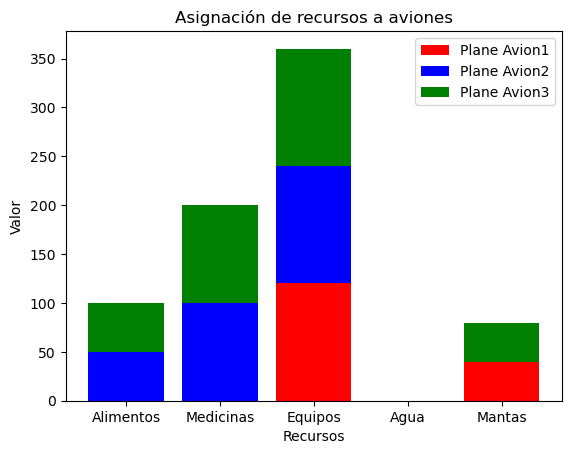

In [19]:
from matplotlib import pyplot as plt

# Data for plotting
resources = recursos# Resource names
P = aviones
values = [valor[r] for r in resources]  # Value of each resource

# Selection status for each plane
selected = [[Model.x[r,p]() for r in resources] for p in P]

# Creating a stacked bar chart
colors = ['red', 'blue', 'green']  # Different colors for each plane

# Plot the resource allocation
for i, p in enumerate(P):
    plt.bar(resources, [v * sel for v, sel in zip(values, selected[i])], color=colors[i], label=f'Plane {p}', bottom=[sum(selected[k][r] * values[r] for k in range(i)) for r in range(len(resources))])

plt.xlabel("Recursos")
plt.ylabel("Valor")
plt.title("Asignación de recursos a aviones")

# Adding labels
plt.xticks(range(len(resources)), resources)
plt.legend()

plt.show()